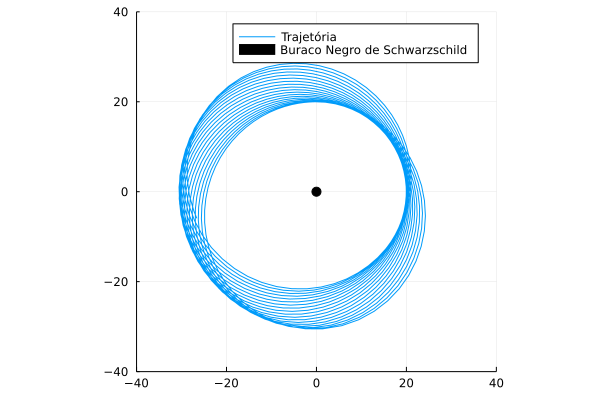

In [11]:
using DifferentialEquations
using Plots

Rs = 1 #Raio de Schwarzschild
x0 = 0 #Distância horizontal
radious = 1.5*Rs
#b = 7.16 #parâmetro de impacto
b = 20 #parâmetro de impacto
tau = 20000.0 #Tempo próprio
function Orbit(dy,x,p,t)
    dy[1] = -(Rs/(Rs*x[4] -x[4]*x[4]))*x[1]*x[3]
    dy[2] = x[1]
    dy[3] = -0.5*(Rs/(x[4]^2) -(Rs^2)/(x[4]^3))*x[1]^2 -0.5*(-Rs/(x[4]-Rs)^2 + Rs^2/(x[4]*(x[4]-Rs)^2))*x[3]^2-(Rs-x[4])*x[5]^2
    dy[4] = x[3]
    dy[5] = -(2/x[4])*x[3]*x[5]
    dy[6] = x[5]
   end

    tspan = (0.0,tau)
    ci = [1/sqrt(1-Rs/sqrt(x0^2+b^2)), 0, -x0/sqrt(x0^2+b^2), sqrt(x0^2+b^2), 0.009, acos(x0/sqrt(x0^2+b^2))]
    prob = ODEProblem(Orbit,ci,tspan)
    soli = solve(prob,AutoTsit5(Rosenbrock23()),reltol=1e-8, abstol=1e-8)

R = soli[4,:]
Theta = soli[6,:]
X = R.*cos.(Theta)
Y = R.*sin.(Theta)
Z = range(0.0, 6.28, length=length(Theta))
Xn = Rs*cos.(Z)
Yn = Rs*sin.(Z)
dim = 40*Rs
plot(X,Y, label = "Trajetória")
plot!(Xn,Yn, label = "Buraco Negro de Schwarzschild",line=(:black, 1),fill=(0, :Black))
plot!(xlim=(-dim,dim))
plot!(ylim=(-dim,dim))
plot!(aspect_ratio=:equal)

In [61]:
print(minimum(soli[1,:]))

0.6012979104160665

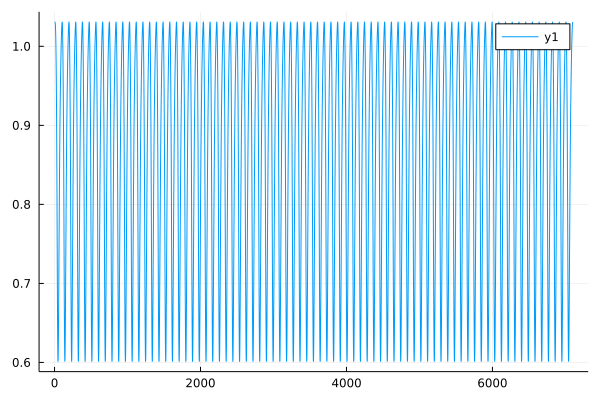

In [62]:
plot(soli[1,:])

In [55]:
1/sqrt(1-Rs/sqrt(x0^2+b^2))

1.0343811953320494

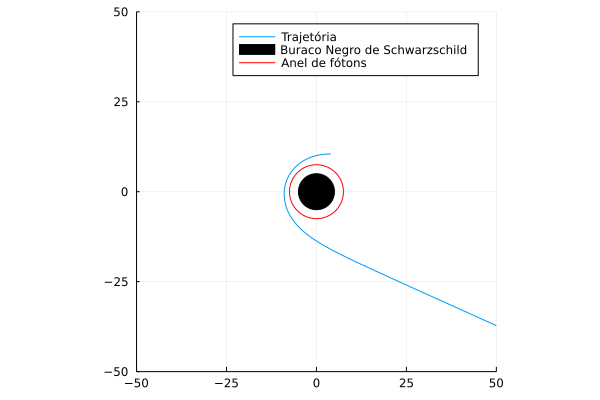

In [27]:
using DifferentialEquations
using Plots
Rs = 5
x0 = 4
b = 10.5
radious = 1.5*Rs
r0 = sqrt(x0^2+b^2)
phi0 = acos(x0/sqrt(x0^2+b^2))
p0 = x0/r0
L = r0*sin(phi0)
tau = 150

function Orbit(dy,x,p,t)

    r = x[1]
    P = x[2]
    phi = x[3]

    dy[1] = P
    dy[2] = L^2*(r-1.5*Rs)/r^4
    dy[3] = L/r^2

   end

    tspan = (0.0,tau)
    ci = [r0, -x0/sqrt(x0^2+b^2), phi0]
    prob = ODEProblem(Orbit,ci,tspan)
    soli = solve(prob,AutoTsit5(Rosenbrock23()),reltol=1e-8, abstol=1e-8)

R = soli[1,:]
Theta = soli[3,:]
X = R.*cos.(Theta)
Y = R.*sin.(Theta)
Z = range(0.0, 6.28, length=length(Theta))
Xn = Rs*cos.(Z)
Yn = Rs*sin.(Z)
dim = 10*Rs
plot(X,Y, label = "Trajetória")
plot!(Xn,Yn, label = "Buraco Negro de Schwarzschild",line=(:black, 1),fill=(0, :Black))
plot!(1.5*Xn,1.5*Yn, label = "Anel de fótons",line=(:red, 1))
plot!(xlim=(-dim,dim))
plot!(ylim=(-dim,dim))
plot!(aspect_ratio=:equal)



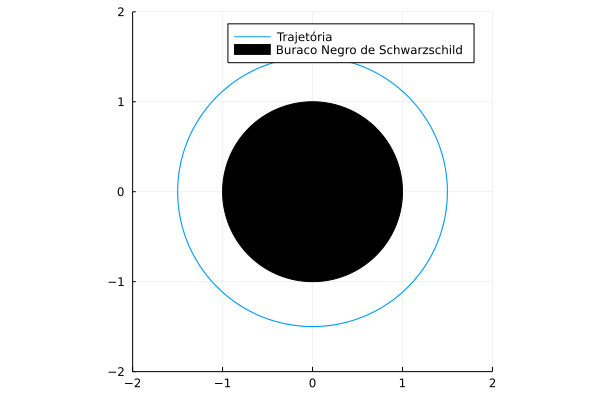

In [6]:
using DifferentialEquations
using Plots

Rs = 1 #Raio de Schwarzschild
x0 = 0 #Distância horizontal
radious = 1.5*Rs
#b = 7.16 #parâmetro de impacto
b = 1.50000001 #parâmetro de impacto
tau = 200.0 #Tempo próprio
w = (1/sqrt(b^2+x0^2)+x0/(x0^2+b^2)*acos(x0/sqrt(x0^2+b^2)))
function Orbit(dy,x,p,t)
    dy[1] = -(Rs/(Rs*x[4] -x[4]*x[4]))*x[1]*x[3]
    dy[2] = x[1]
    dy[3] = -0.5*(Rs/(x[4]^2) -(Rs^2)/(x[4]^3))*x[1]^2 -0.5*(-Rs/(x[4]-Rs)^2 + Rs^2/(x[4]*(x[4]-Rs)^2))*x[3]^2-(Rs-x[4])*x[5]^2
    dy[4] = x[3]
    dy[5] = -(2/x[4])*x[3]*x[5]
    dy[6] = x[5]
   end

    tspan = (0.0,tau)
    ci = [1/sqrt(1-Rs/sqrt(x0^2+b^2)), 0, -x0/sqrt(x0^2+b^2), sqrt(x0^2+b^2), w, acos(x0/sqrt(x0^2+b^2))]
    prob = ODEProblem(Orbit,ci,tspan)
    soli = solve(prob,TanYam7(),reltol=1e-15, abstol=1e-15)

R = soli[4,:]
Theta = soli[6,:]
X = R.*cos.(Theta)
Y = R.*sin.(Theta)
Z = range(0.0, 6.28, length=length(Theta))
Xn = Rs*cos.(Z)
Yn = Rs*sin.(Z)
dim = 2*Rs
plot(X,Y, label = "Trajetória")
plot!(Xn,Yn, label = "Buraco Negro de Schwarzschild",line=(:black, 1),fill=(0, :Black))
plot!(xlim=(-dim,dim))
plot!(ylim=(-dim,dim))
plot!(aspect_ratio=:equal)

In [ ]:
savefig("PlotBLCKH.pdf")

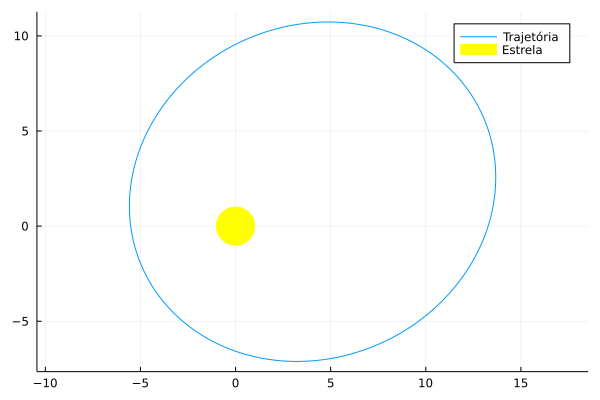

In [2]:
using DifferentialEquations
using Plots
x0 = 1.0
b = 10.0
Rs = 1.0
Vt = 0.05
omega = (Vt/sqrt(b^2+x0^2)+x0/(x0^2+b^2)*acos(x0/sqrt(x0^2+b^2)))
function Orbit(dy,x,p,t)
    w, o, v, r = x
    dy[1] = -2*v*w/r
    dy[2] = w
    dy[3] = r*w^2-Rs/(2*r^2)
    dy[4] = v
   end
tspan = (0.0,1000.0)
ci = [omega,acos(x0/sqrt(x0^2+b^2)),-x0/sqrt(x0^2+b^2),sqrt(x0^2+b^2)]
prob = ODEProblem(Orbit,ci,tspan)
soli = solve(prob,TanYam7(),reltol=1e-15, abstol=1e-15)

R = soli[4,:]
Theta = soli[2,:]
X = R.*cos.(Theta)
Y = R.*sin.(Theta)
plot(X,Y, label = "Trajetória")
plot!(Xn,Yn, label = "Estrela",line=(:yellow, 1),fill=(0, :yellow))
plot!(aspect_ratio=:equal)

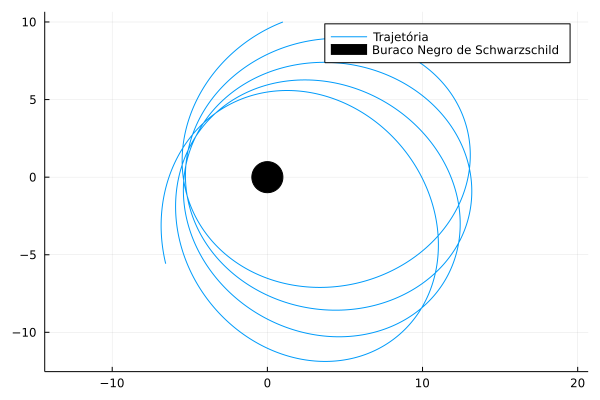

In [1]:
using DifferentialEquations
using Plots

Rs = 1.0 #Raio de Schwarzschild
x0 = 1.0 #Distância horizontal
radious = 1.5*Rs
#b = 7.16 #parâmetro de impacto
b = 10.0 #parâmetro de impacto
tau = 1000 #Tempo próprio
Vt = 0.05
w = (Vt/sqrt(b^2+x0^2)+x0/(x0^2+b^2)*acos(x0/sqrt(x0^2+b^2)))
function Orbit(dy,x,p,t)
    dy[1] = -(Rs/(Rs*x[4] -x[4]*x[4]))*x[1]*x[3]
    dy[2] = x[1]
    dy[3] = -0.5*(Rs/(x[4]^2) -(Rs^2)/(x[4]^3))*x[1]^2 -0.5*(-Rs/(x[4]-Rs)^2 + Rs^2/(x[4]*(x[4]-Rs)^2))*x[3]^2-(Rs-x[4])*x[5]^2
    dy[4] = x[3]
    dy[5] = -(2/x[4])*x[3]*x[5]
    dy[6] = x[5]
   end

    tspan = (0.0,tau)
    ci = [1/sqrt(1-Rs/sqrt(x0^2+b^2)), 0, -x0/sqrt(x0^2+b^2), sqrt(x0^2+b^2), w, acos(x0/sqrt(x0^2+b^2))]
    prob = ODEProblem(Orbit,ci,tspan)
    soli = solve(prob,TanYam7(),reltol=1e-15, abstol=1e-15)

R = soli[4,:]
Theta = soli[6,:]
X = R.*cos.(Theta)
Y = R.*sin.(Theta)
Z = range(0.0, 6.28, length=length(Theta))
Xn = Rs*cos.(Z)
Yn = Rs*sin.(Z)
dim = 2*Rs
plot(X,Y, label = "Trajetória")
plot!(Xn,Yn, label = "Buraco Negro de Schwarzschild",line=(:black, 1),fill=(0, :Black))
#plot!(xlim=(-dim,dim))
#plot!(ylim=(-dim,dim))
plot!(aspect_ratio=:equal)